<a href="https://colab.research.google.com/github/CarveTheFuture/Hard_Drive_Reliability/blob/main/drive_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv, sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
#Import scikit-learn metrics module for accuracy calculation


In [ ]:
X_train=pd.read_csv('/content/drive/MyDrive/Analysis_Deta/2019/Model_Inputs/X_train_hours.csv')
X_test=pd.read_csv('/content/drive/MyDrive/Analysis_Deta/2019/Model_Inputs/X_test_hours.csv')

In [ ]:
X_train.head(2)

,Unnamed: 0,Unnamed: 0.1,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_12_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,fail_date,date_fail,perform,days
0,0,0,2019-01-01,Z302BV7C,ST4000DM000,4000787030016,0,119.0,231195280.0,93.0,7.0,100.0,0.0,87.0,526658972.0,65.0,30873.0,7.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,76.0,24.0,0.0,81.0,38399.0,24.0,24.0,100.0,0.0,100.0,0.0,0.0,30503.0,5.403677e+10,1.219510e+11,"4011 2019-11-13\nName: date, dtype: object",2019-11-13,11,0.0
1,1,1,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,9.0,100.0,0.0,86.0,429695685.0,68.0,28392.0,9.0,98.0,2.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,77.0,23.0,0.0,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,0.0,28300.0,4.796113e+10,1.341161e+11,"10102 2019-01-27\nName: date, dtype: object",2019-01-27,7,0.0


In [ ]:
len(X_train.columns)

46

In [ ]:
col_select=list(range(7,42))

In [ ]:
col_select.insert(0,2)

In [ ]:
col_select.append(45)

In [ ]:
col_select

[7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 45]

In [ ]:
X_test.iloc[:,col_select]
X_test.iloc[:,col_select]

,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_12_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,days
0,117.0,128870072.0,97.0,3.0,100.0,0.0,86.0,439401398.0,68.0,28869.0,3.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,73.0,27.0,0.0,98.0,4683.0,27.0,27.0,100.0,0.0,100.0,0.0,0.0,28817.0,4.531048e+10,1.488980e+11,181.0
1,119.0,222985768.0,99.0,1.0,100.0,8.0,87.0,536462463.0,64.0,32014.0,1.0,100.0,0.0,100.0,0.0,97.0,3.0,0.0,100.0,0.0,79.0,21.0,0.0,93.0,14392.0,21.0,21.0,100.0,0.0,100.0,0.0,0.0,31864.0,4.958817e+10,1.437131e+11,181.0
2,116.0,116254936.0,92.0,22.0,100.0,0.0,88.0,749708904.0,62.0,33360.0,22.0,100.0,0.0,100.0,0.0,94.0,6.0,0.0,100.0,0.0,73.0,27.0,0.0,95.0,11279.0,27.0,27.0,100.0,8.0,100.0,8.0,0.0,33166.0,5.609418e+10,1.356669e+11,181.0
3,107.0,12808544.0,92.0,8.0,100.0,8.0,87.0,587682537.0,64.0,31673.0,8.0,100.0,0.0,100.0,0.0,93.0,7.0,0.0,100.0,0.0,83.0,17.0,0.0,95.0,10221.0,17.0,17.0,100.0,16.0,100.0,16.0,0.0,31512.0,4.921086e+10,1.419216e+11,181.0
4,108.0,17344424.0,92.0,16.0,100.0,0.0,87.0,527426712.0,63.0,32714.0,16.0,98.0,2.0,100.0,0.0,98.0,2.0,0.0,100.0,0.0,79.0,21.0,0.0,96.0,8307.0,21.0,21.0,100.0,0.0,100.0,0.0,0.0,32619.0,4.736926e+10,1.450949e+11,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19444,118.0,172800200.0,92.0,10.0,100.0,0.0,90.0,966047716.0,59.0,36285.0,10.0,98.0,2.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,75.0,25.0,0.0,98.0,5010.0,25.0,25.0,100.0,0.0,100.0,0.0,0.0,36228.0,5.677281e+10,1.795280e+11,352.0
19445,115.0,97559216.0,92.0,12.0,100.0,0.0,89.0,842025587.0,59.0,36308.0,12.0,100.0,0.0,100.0,0.0,98.0,2.0,0.0,100.0,0.0,76.0,24.0,0.0,95.0,11985.0,24.0,24.0,100.0,0.0,100.0,0.0,0.0,36217.0,5.310688e+10,2.165311e+11,353.0
19446,117.0,156097360.0,92.0,10.0,100.0,0.0,90.0,968258888.0,59.0,36309.0,10.0,98.0,2.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,75.0,25.0,0.0,98.0,5013.0,25.0,25.0,100.0,0.0,100.0,0.0,0.0,36252.0,5.678595e+10,1.798410e+11,353.0
19447,111.0,62045744.0,92.0,12.0,100.0,0.0,89.0,843302032.0,59.0,36332.0,12.0,100.0,0.0,100.0,0.0,97.0,3.0,0.0,100.0,0.0,76.0,24.0,0.0,95.0,11985.0,24.0,24.0,100.0,24.0,100.0,24.0,0.0,36241.0,5.311607e+10,2.166948e+11,354.0


In [ ]:
start=pd.to_datetime(X_train['date'], yearfirst=True)[0]

In [ ]:
f=((pd.to_datetime(X_train['date'], yearfirst=True))-start)/ np.timedelta64(1,'D')
g=((pd.to_datetime(X_test['date'], yearfirst=True))-start)/ np.timedelta64(1,'D')

In [ ]:
f

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
95249    181.0
95250    181.0
95251    181.0
95252    181.0
95253    181.0
Name: date, Length: 95254, dtype: float64

In [ ]:
X_train['days']=f
X_test['days']=g


In [ ]:
xtrain=X_train.iloc[:,col_select]
xtest=X_test.iloc[:,col_select]

In [ ]:
xtrain.to_csv('/content/drive/MyDrive/Analysis_Deta/2019/Model_Inputs/xtrain_tree.csv')
xtest.to_csv('/content/drive/MyDrive/Analysis_Deta/2019/Model_Inputs/xtest_tree.csv')

In [ ]:
ytrain.to_csv('/content/drive/MyDrive/Analysis_Deta/2019/Model_Inputs/ytrain.csv')
ytest.to_csv('/content/drive/MyDrive/Analysis_Deta/2019/Model_Inputs/ytest.csv')

In [ ]:
xtrain.isnull().any()

smart_1_normalized       True
smart_1_raw              True
smart_3_normalized       True
smart_4_raw              True
smart_5_normalized       True
smart_5_raw              True
smart_7_normalized       True
smart_7_raw              True
smart_9_normalized       True
smart_9_raw              True
smart_12_raw             True
smart_183_normalized     True
smart_183_raw            True
smart_184_normalized     True
smart_184_raw            True
smart_187_normalized     True
smart_187_raw            True
smart_188_raw            True
smart_189_normalized     True
smart_189_raw            True
smart_190_normalized     True
smart_190_raw            True
smart_192_raw            True
smart_193_normalized     True
smart_193_raw            True
smart_194_normalized     True
smart_194_raw            True
smart_197_normalized     True
smart_197_raw            True
smart_198_normalized     True
smart_198_raw            True
smart_199_raw            True
smart_240_raw            True
smart_241_

In [ ]:
xtest.isnull().any()

smart_1_normalized      False
smart_1_raw             False
smart_3_normalized      False
smart_4_raw             False
smart_5_normalized      False
smart_5_raw             False
smart_7_normalized      False
smart_7_raw             False
smart_9_normalized      False
smart_9_raw             False
smart_12_raw            False
smart_183_normalized    False
smart_183_raw           False
smart_184_normalized    False
smart_184_raw           False
smart_187_normalized    False
smart_187_raw           False
smart_188_raw           False
smart_189_normalized    False
smart_189_raw           False
smart_190_normalized    False
smart_190_raw           False
smart_192_raw           False
smart_193_normalized    False
smart_193_raw           False
smart_194_normalized    False
smart_194_raw           False
smart_197_normalized    False
smart_197_raw           False
smart_198_normalized    False
smart_198_raw           False
smart_199_raw           False
smart_240_raw           False
smart_241_

In [ ]:
ytrain=X_train['perform']
ytest=X_test['perform']

In [ ]:
ytest.isnull().any()

False

In [ ]:
to_drop=[]
for i in X_train.columns:
  try:
    index = X_train[i].index[X_train[i].apply(np.isnan)]
    to_drop.append(index)
  except:
    pass

In [ ]:
to_drop

[Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64Index([15739, 20315, 20316, 22178, 44588, 71723], dtype='int64'),
 Int64In

In [ ]:
remov=[15739, 20315, 20316, 22178, 44588, 71723]

In [ ]:
xtrain=xtrain.drop(remov)
ytrain=ytrain.drop(remov)

In [ ]:
xtrain.head(2)

,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_12_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,days
0,119.0,231195280.0,93.0,7.0,100.0,0.0,87.0,526658972.0,65.0,30873.0,7.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,76.0,24.0,0.0,81.0,38399.0,24.0,24.0,100.0,0.0,100.0,0.0,0.0,30503.0,5.403677e+10,1.219510e+11,0.0
1,119.0,208663312.0,92.0,9.0,100.0,0.0,86.0,429695685.0,68.0,28392.0,9.0,98.0,2.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,77.0,23.0,0.0,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,0.0,28300.0,4.796113e+10,1.341161e+11,0.0


In [ ]:
len(xtrain)

95248

In [ ]:
ytrain

0        11
1         7
2         7
3         7
4         8
         ..
95249     8
95250    10
95251     9
95252    10
95253    10
Name: perform, Length: 95248, dtype: int64

In [ ]:
clf = ExtraTreesClassifier(n_estimators=100)
print(clf)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False) 

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
clf.fit(xtrain, ytrain)

score = clf.score(xtrain, ytrain)
print("Score: ", score)

Score:  1.0


In [ ]:
cv_scores = cross_val_score(clf, xtrain, ytrain, cv=5 )
print("CV average score: %.2f" % cv_scores.mean())


CV average score: 0.93


In [ ]:
#@title Default title text
ypred = clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[  60    0    0    0    0    0    0    0    0]
 [   0  125   70    0    0    0    0    0    0]
 [   0    0  122    0    0    0    0    0    0]
 [   0    0    0  498   61  133   25    0    0]
 [   0    0    0    0 2098  284  370    0    0]
 [   0    0    0    0   31 4059 1822  112    0]
 [   0    0    0    0    2  189 7442  317    0]
 [   0    0    0    0    0    0  100 1137    0]
 [   0    0    0    0    0    0    0    0  392]]


In [ ]:
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.8192194971463829


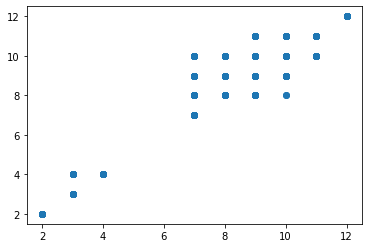

In [ ]:
plt.scatter(ytest,ypred)

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree


In [ ]:
clf.feature_importances_

array([9.26842154e-04, 9.91891866e-04, 6.35497370e-02, 5.97068581e-02,
       2.86279356e-03, 1.11670327e-02, 2.92323271e-02, 3.74822972e-02,
       3.66838038e-02, 4.20225479e-02, 6.18279558e-02, 3.34255882e-02,
       3.28590032e-02, 3.59809369e-03, 3.92837245e-03, 3.34146210e-02,
       3.46183194e-02, 4.53972577e-03, 2.87720330e-04, 2.73923080e-04,
       2.28969939e-02, 2.37628871e-02, 1.97830121e-02, 7.66116183e-02,
       8.98604685e-02, 2.32901686e-02, 2.30903946e-02, 2.54836175e-05,
       1.80088651e-02, 1.53922167e-05, 1.72760213e-02, 8.35236688e-03,
       3.81155469e-02, 7.56135191e-02, 4.90768693e-02, 2.08209382e-02])

In [ ]:
len(clf.feature_importances_)

36

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True,special_characters=True,feature_names = xtrain.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hard_drive_classification.png')
Image(graph.create_png())